Лабораторна робота №2
1.	Сформувати тестову вибірку зображень з вихідного пакета;
2.	Для кожного каналу кольору кожного зображення з тестового пакета обчислити наступні характеристики:
a.	Математичне сподівання і дисперсію;
b.	Коефіцієнти асиметрії та ексцесу (нормалізований);
3.	Побудувати вектори параметрів зображень, що складаються з:
a.	Математичних очікувань значень яскравості для кожного каналу кольору;
b.	Математичних очікувань і дисперсії значень яскравості для кожного каналу кольору;
c.	Математичних очікувань, дисперсії і коефіцієнта асиметрії значень яскравості для кожного каналу кольору;
d.	Математичних очікувань, дисперсії, коефіцієнтів асиметрії та ексцесу значень яскравості для кожного каналу кольору;
4.	Побудувати гаусові моделі зображень з використанням розрахованих раніше параметрів.
5.	Провести декомпозицію кожного каналу кольору кожного зображення з застосуванням методу головних компонент (PCA):
a.	Варіюючи кількість компонент, провести реконструкцію окремих каналів кольору зображень (від компонент з найбільшою енергією поступово переходячи до компонентів з мінімальною енергією).
b.	Побудувати залежність помилки відновлення (середнє відхилення вихідного зображення відреконструйованого, MSE) від кількості використаних компонент.
6.	Провести моделювання окремих каналів кольору зображень з використанням марковських ланцюгів:
a.	Для кожного каналу кольору кожного зображення розрахувати стохастическую матрицю марковської ланцюга першого і другого порядків (обробка пікселів по горизонталі справа наліво і навпаки, а також по вертикалі зверху вниз і навпаки). У звіті привести явний вигляд однієї марковської ланцюга для одного з каналів кольору тестового зображення;
b.	Перевірити властивість регулярності, реккурентное і незворотності (irreducible) для отриманих марковских моделей для 5 ітерацій.


In [2]:
import os 
import time
import numpy  as np
from PIL import Image
import random 
from scipy.stats import iqr
from scipy.stats import skew,kurtosis
import seaborn as sns


In [3]:
test_index = random.sample(range(6,25001),250)
# Path to where my test images are stored
img_folder = os.path.join(os.getcwd(), 'mirflickr/')


test_images = []
for i in test_index:
    test_images.append('C:\\Users\\malin\\Desktop\\Diplom\\datasets\\mirflickr/im'+ str(i) + '.jpg')

# Your code, but wrapped up in a function       
def convert(filename):  
    im = Image.open(filename,mode = "r")
    return np.array(im)
def img_list():
    t = time.time() 
    np_arrays = map(convert, test_images)
    arr_list = [i for i in np_arrays]
    return  arr_list



In [4]:
import matplotlib.pyplot as plt
import scipy
import pandas as pd


Математичних очікувань, дисперсії, коефіцієнтів асиметрії та ексцесу значень яскравості для кожного каналу кольору;

In [5]:
params = ['Image Number','Channel Number','ExpValue(UnifDist)','Variance','Skew',"Kurtosis","Intensity of channel",'Img']
def part1(img):
    param_list = []
    for i in range(len(img)):
        temp = img[i]# divide by 255 to get in fraction
        mn = temp.sum(axis=0).sum(axis=0)/(temp.shape[0]*temp.shape[1])
        intensity_of_channels = mn/np.linalg.norm(mn, ord=None)

        for Channel in range(3):
            img_ch = img[i][:,:,Channel]
            param_list.append(list((test_index[i],Channel,np.mean(img_ch),np.var(img_ch)
                                    ,skew(img_ch,None),kurtosis(img_ch,None),intensity_of_channels[Channel],img_ch)))
    
    return pd.DataFrame(param_list,columns = params)

In [119]:
images = img_list()
Data = part1(images)

x_i = Data[['ExpValue(UnifDist)','Variance','Skew','Kurtosis','Intensity of channel']]
labels  = x_i.columns

In [165]:
x_i

,ExpValue(UnifDist),Variance,Skew,Kurtosis,Intensity of channel
0,150.627273,6792.487471,-0.032413,-1.444661,0.614037
1,149.647964,6395.649152,-0.154798,-1.227828,0.610045
2,122.850204,7618.270648,0.385861,-1.309527,0.500803
3,60.279976,936.991655,1.165242,2.382905,0.305634
4,114.855694,939.396023,-0.152906,-0.281871,0.582345
...,...,...,...,...,...
745,174.207351,4923.980604,-0.773652,-0.759085,0.577350
746,174.207351,4923.980604,-0.773652,-0.759085,0.577350
747,97.200783,5331.644289,0.530240,-0.787620,0.607428
748,102.032090,5418.059940,0.402357,-0.947879,0.637620


In [120]:
from  scipy.stats import multivariate_normal
from sklearn.preprocessing import MinMaxScaler

ss = MinMaxScaler()
ss.fit(x_i)
x_i_scaled = pd.DataFrame(ss.transform(x_i),columns=labels)
std = np.array(x_i_scaled.std())
cov = np.cov(x_i_scaled.T)

In [121]:
cov_diag = np.eye(5,5) * np.array(x_i_scaled.var())

In [122]:
gauss_samples_from_distributions = np.random.multivariate_normal(std,cov_diag,750) 

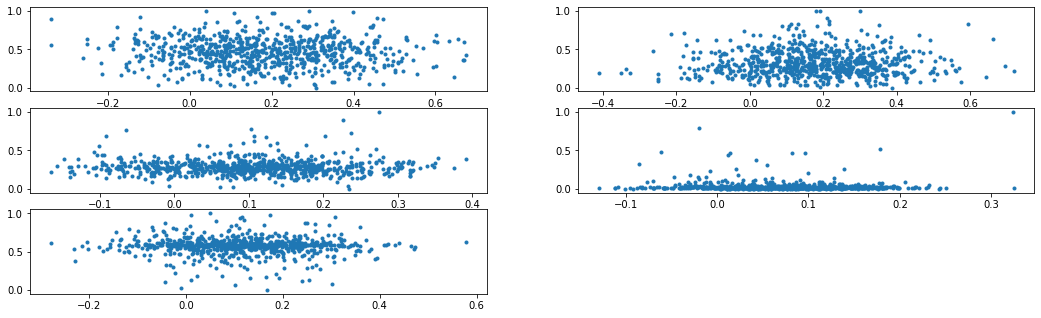

In [124]:
plt.figure(5,figsize=(18,9))
plt.subplot('521');plt.plot(gauss_samples_from_distributions[:,0],x_i_scaled['ExpValue(UnifDist)'],'.')
plt.subplot('522');plt.plot(gauss_samples_from_distributions[:,1],x_i_scaled['Variance'],'.')
plt.subplot('523');plt.plot(gauss_samples_from_distributions[:,2],x_i_scaled['Skew'],'.')
plt.subplot('524');plt.plot(gauss_samples_from_distributions[:,3],x_i_scaled['Kurtosis'],'.')
plt.subplot('525');plt.plot(gauss_samples_from_distributions[:,4],x_i_scaled['Intensity of channel'],'.')
plt.show()

In [125]:
gauss_pdf = multivariate_normal.pdf(gauss_samples_from_distributions,std,cov_diag)

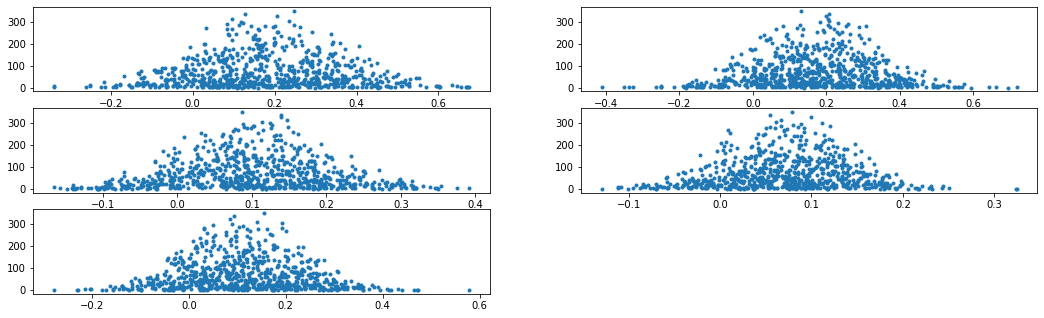

In [126]:
plt.figure(5,figsize=(18,9))
plt.subplot('521');plt.plot(gauss_samples_from_distributions[:,0],gauss_pdf,'.')
plt.subplot('522');plt.plot(gauss_samples_from_distributions[:,1],gauss_pdf,'.')
plt.subplot('523');plt.plot(gauss_samples_from_distributions[:,2],gauss_pdf,'.')
plt.subplot('524');plt.plot(gauss_samples_from_distributions[:,3],gauss_pdf,'.')
plt.subplot('525');plt.plot(gauss_samples_from_distributions[:,4],gauss_pdf,'.')


plt.show()

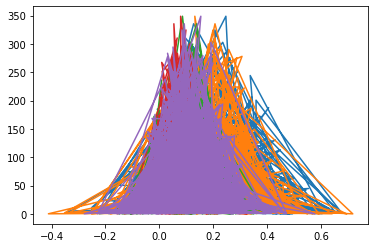

In [127]:
plt.plot(gauss_samples_from_distributions,gauss_pdf)#lower dimension representation
plt.show()

Провести декомпозицію кожного каналу кольору кожного зображення з застосуванням методу головних компонент (PCA): a. Варіюючи кількість компонент, провести реконструкцію окремих каналів кольору зображень (від компонент з найбільшою енергією поступово переходячи до компонентів з мінімальною енергією). b. Побудувати залежність помилки відновлення (середнє відхилення вихідного зображення відреконструйованого, MSE) від кількості використаних компонент.

In [128]:
from sklearn.decomposition import  PCA
from sklearn.preprocessing import normalize
import cv2

In [129]:
images  = Data['Img']
shape_0 = min([i.shape[0] for i in images])
shape_1 = min([i.shape[1] for i in images])

def resize(images,min_x,min_y):
    resized = []
    for i in images:
        img_rez = cv2.resize(i,(shape_0,shape_1),interpolation=cv2.INTER_CUBIC)
        resized.append(img_rez)
    return np.array(resized).reshape((-1,shape_0,shape_1))       

In [130]:
resized_images = resize(images,shape_0,shape_1)
flatened_images = resized_images.reshape((750,shape_0*shape_1))
standarting_images = flatened_images/255

In [131]:
import fbpca
from bisect import bisect_left

def compute_explained_variance(singular_values):
    return np.cumsum(singular_values**2)/np.sum(singular_values**2)

def ideal_number_components(X, wanted_explained_variance):
    singular_values = fbpca.svd(X, compute_uv=False)  \ 
    explained_variance = compute_explained_variance(singular_values)
    return bisect_left(explained_variance, wanted_explained_variance)

def auto_pca(X, wanted_explained_variance):
    num_components = ideal_number_components(X, wanted_explained_variance)
    return fbpca.pca(X, num_components)    

In [132]:
def image_PCA(images,energy):
    model = PCA(energy)
    model.fit(images)
    tr_images = model.transform(images)
    return model,tr_images

In [133]:
image_PCA(standarting_images,200)

(PCA(copy=True, iterated_power='auto', n_components=200, random_state=None,
     svd_solver='auto', tol=0.0, whiten=False),
 array([[ 3.52579491e+01, -3.17219279e+01,  1.39382857e+01, ...,
         -1.21248058e-01,  9.89126882e-02, -6.52106340e-01],
        [ 3.49913086e+01, -2.21726777e+01,  1.23408853e+01, ...,
         -3.75974103e-01, -1.85428481e-01, -4.05382120e-01],
        [ 1.56673910e+01,  2.87376006e-02, -1.06627161e+01, ...,
         -4.23006069e-01, -1.90828286e+00,  3.90469298e-01],
        ...,
        [-9.43951195e+00, -1.66506187e+01, -5.77437772e+00, ...,
         -3.31304333e-01, -2.64788315e-01, -1.68316080e-01],
        [-4.69346702e+00, -9.29532206e+00, -5.51956985e+00, ...,
         -5.85178097e-01, -3.53693382e-01, -3.42376758e-01],
        [-3.07553451e+01, -2.50176382e+01,  1.09462220e+00, ...,
          9.20146684e-02,  3.48680623e-01, -1.73538262e-01]]))

In [134]:
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err


In [135]:
some_channel_index = np.random.choice(750,50)
some_channel_index

array([659, 507,  38,  98, 601, 417,  87, 425, 205, 401,   2, 347, 666,
       593, 464, 586, 455, 698, 199, 596, 482, 224, 370, 533,  15, 512,
        98, 121,  89, 588,  27, 585, 369, 530,  22, 424,   0, 558, 147,
       622, 267, 562, 553, 444, 149, 695,  27, 709, 444, 744])

In [146]:
model,compressed_img = image_PCA(standarting_images,.99)

In [147]:
reconstr = model.inverse_transform(compressed_img * 255)

In [167]:
mse_log = np.array(list(map(mse,reconstr.reshape((750,shape_0,shape_1)),standarting_images.reshape((750,shape_0,shape_1)))))
print("Mean MSE - " ,np.mean(mse_log))

Mean MSE -  5797.824853968864


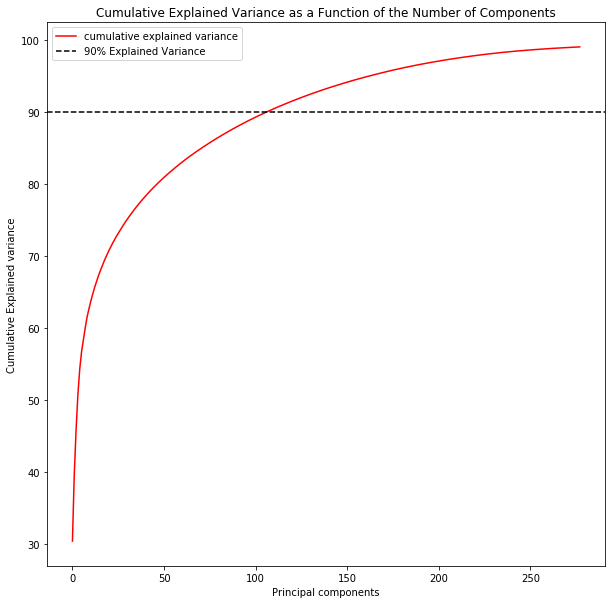

In [152]:
cumsum = np.cumsum(model.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(10, 10))
plt.plot(d,cumsum, color = 'red',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 90, color='k', linestyle='--', label = '90% Explained Variance')
plt.legend(loc='best')

In [150]:
some_channel_index = np.random.choice(750,300)
some_set = standarting_images[some_channel_index]
some_set.shape

(300, 53700)

In [151]:
n_components = np.arange(50,300,25)
def func(n_components,some_set,shape_0,shape_1):
    models_data = []
    compressed_list_by_ncomponents = []
    mse_log_list = []
    mean_mse = []
    for i in n_components: 
        model1,compressed_images = image_PCA(some_set,i)
        models_data.append(model)
        compressed_list_by_ncomponents.append(compressed_images)
        reconstr = model1.inverse_transform(compressed_images)
        mse_log = np.array(list(map(mse,reconstr.reshape((300,shape_0,shape_1)),some_set.reshape((300,shape_0,shape_1)))))
        mse_log_list.append(mse_log)
        mean_mse.append(np.mean(mse_log))
    return n_components,np.array(mean_mse),np.array(mse_log_list)

In [142]:
ar = func(n_components,some_set,shape_0,shape_1)

## PCA is not the best choice for image compression especially  when images have low similarity

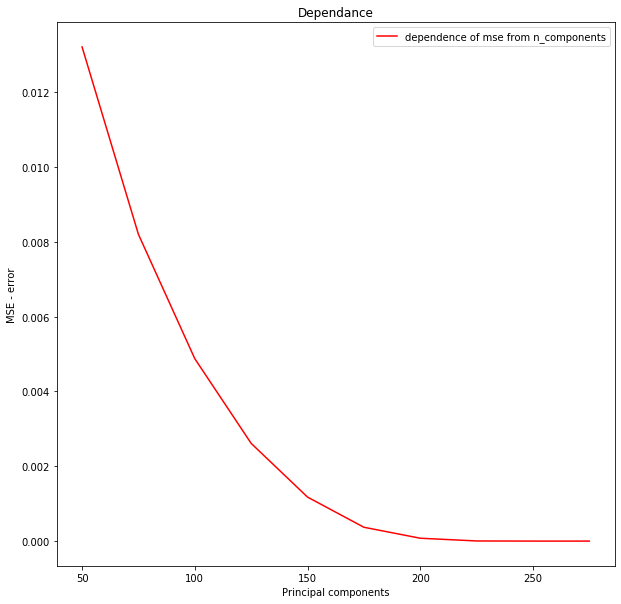

In [143]:
plt.figure(figsize=(10, 10))
plt.plot(ar[0],ar[1],color = 'red',label='dependence of mse from n_components')
plt.title('Dependance')
plt.ylabel('MSE - error')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

Провести моделювання окремих каналів кольору зображень з використанням марковських ланцюгів: a. Для кожного каналу кольору кожного зображення розрахувати стохастическую матрицю марковської ланцюга першого і другого порядків (обробка пікселів по горизонталі справа наліво і навпаки, а також по вертикалі зверху вниз і навпаки). У звіті привести явний вигляд однієї марковської ланцюга для одного з каналів кольору тестового зображення; b. Перевірити властивість регулярності, реккурентное і незворотності (irreducible) для отриманих марковских моделей для 5 ітерацій.


In [153]:
def transition_matrix(arr, order):
    _shape = (max(arr) + 1,) * (order + 1)
    M = np.zeros(_shape)

    for _ind in zip(*[arr[_x:] for _x in range(order + 1)]):
        M[_ind] += 1
    return np.array(M)

In [154]:
def images_tranition(images,order):
    final = []
    for i in images:
        TM_vert = []
        TM_hor = []
        for x in range(i.shape[0]):
            hor = np.array(list(reversed(i[x,:])))
            hor_tran = transition_matrix(hor,order)
            TM_hor.append(hor_tran)
        for y in range(i.shape[1]):
            vert = np.array(list(reversed(i[:,y])))
            vert_tran = transition_matrix(vert,order)
            TM_vert.append(vert_tran)
        TM_vert = np.array(TM_vert)
        TM_hor = np.array(TM_hor)
        final.append(list((TM_vert,TM_hor)))
    return np.array(final)



In [160]:
test = Data['Img'][:10]


In [161]:
result_1order = images_tranition(test,1)# 1st order transition_matrix 

In [168]:
#result_1order

In [ ]:
result_2order = images_tranition(test,2)# 2st order transition_matrix 

In [95]:
states = (list(reversed(test[:,0])))
Q = transition_matrix(states,1)
states = [tuple(i) for i in states]

In [99]:
G = nx.MultiDiGraph()
labels={}
edge_labels={}

for i, origin_state in enumerate(states):
    for j, destination_state in enumerate(states):
        rate = Q[i][j]
        if rate > 0:
            G.add_edge(origin_state,
                       destination_state,
                       weight=rate,
                       label="{:.02f}".format(rate))
            edge_labels[(origin_state, destination_state)] = label="{:.02f}".format(rate)

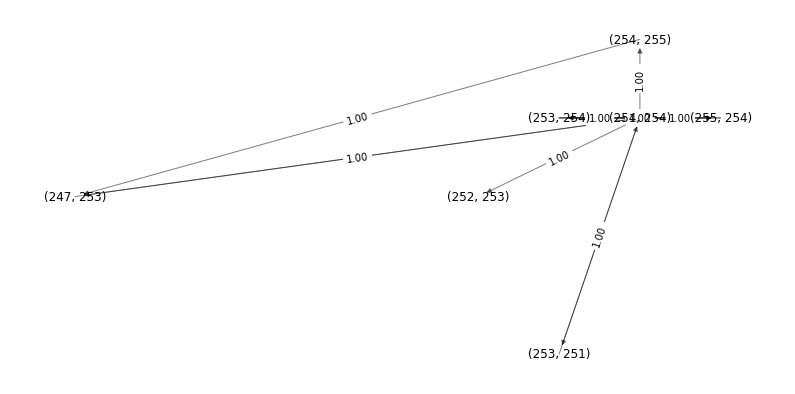

In [100]:
plt.figure(figsize=(14,7))
node_size = 200
pos = {state:list(state) for state in states}
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
nx.draw_networkx_labels(G, pos, font_weight=2)
nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.axis('off');

In [117]:
test = np.array(list(reversed(Data["Img"][34][:,5])))
m = transition_matrix(test,1)
m  = np.array(m)
for row in m: print(' '.join('{0:.2f}'.format(x) for x in row))

0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 

## Matrix is IRreducible, NOT recurrent and regular